STARTING COMPREHENSIVE EDA ANALYSIS
Loaded 253,570 tokens from unigram_re.csv
=== FREQUENCY DISTRIBUTION ANALYSIS ===
Total tokens: 9,378,977
Unique tokens: 253,570
Average frequency: 36.99
Median frequency: 1.00


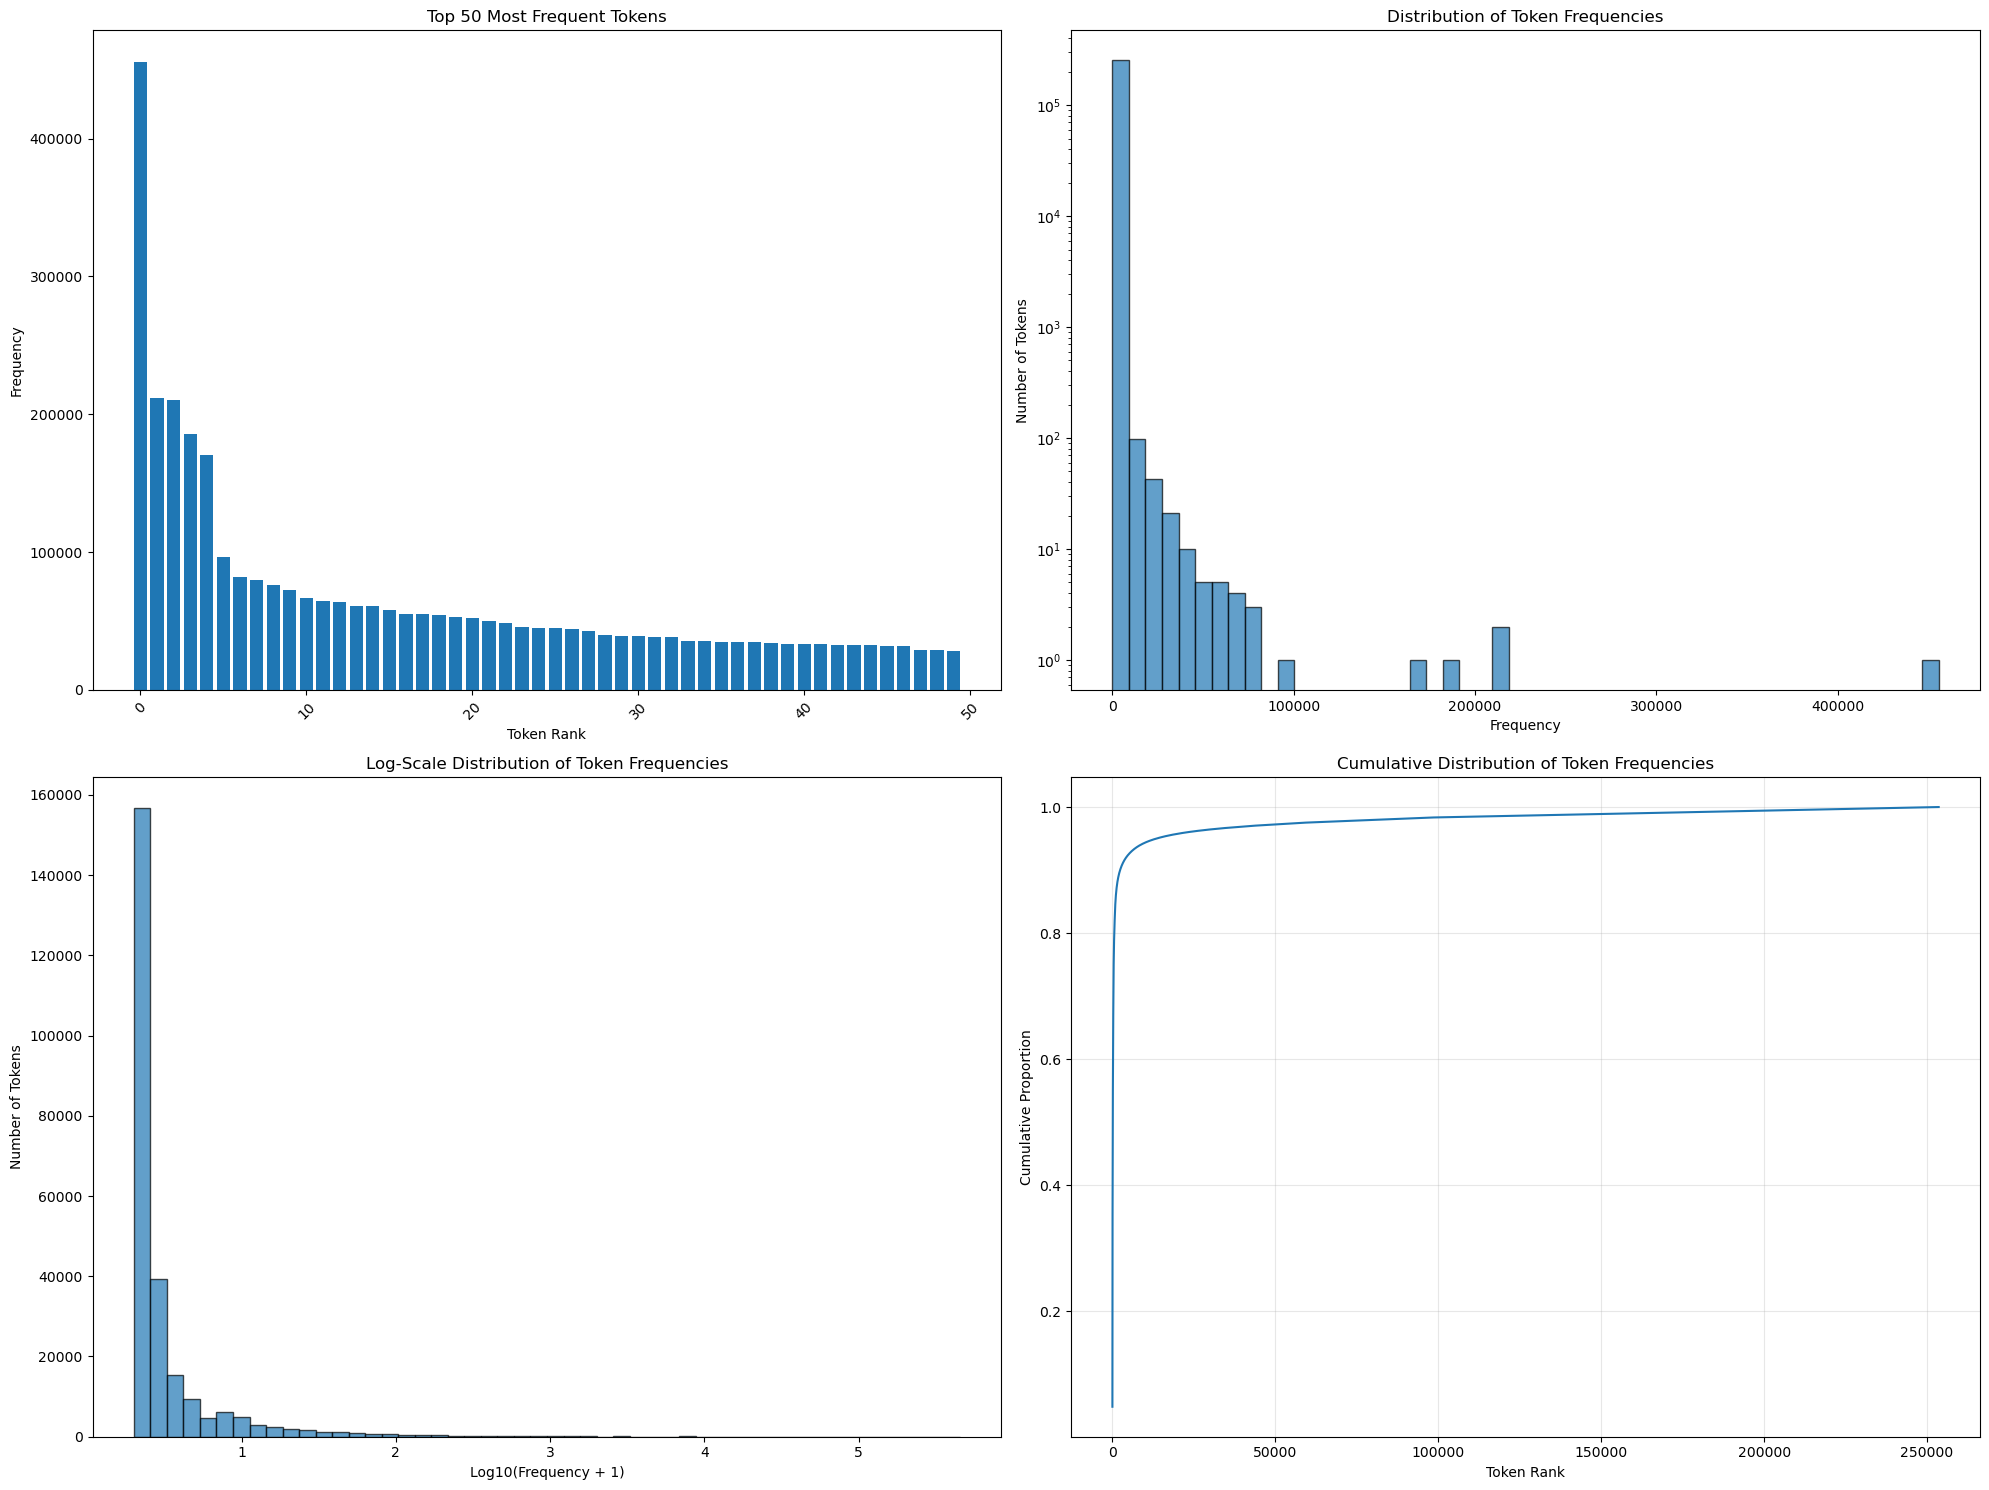


=== SUMMARY STATISTICS ===
Count: 253,570
Mean: 36.99
Median: 1.00
Mode: 1
Standard Deviation: 1439.73
Variance: 2072820.19
Min: 1
Max: 455,768
Q1 (25th percentile): 1.00
Q3 (75th percentile): 2.00
IQR: 1.00
Skewness: 174.77
Kurtosis: 45496.00

=== TOP 50 MOST FREQUENT TOKENS ===
थ्व: 455,768
दु: 211,478
थाय्: 210,236
व: 185,876
भाषा: 170,387
खः: 96,361
ख: 81,789
या: 79,930
थासय्: 75,808
नं: 72,317
कथं: 66,987
छगू: 64,549
भारतया: 63,949
खने: 61,233
संकिपा: 61,068
निसें: 57,713
छ्येलिगु: 55,424
राज्यया: 54,910
कुल: 54,171
स्वापू: 52,797
उत्तराखण्ड: 52,335
छगु: 49,942
तक्क: 48,406
सन्: 45,349
संस्कृत: 44,759
मू: 44,654
छ्येलेज्या: 44,145
थन: 42,555
धुंका: 39,876
हिन्दी: 39,317
लिधंसा: 39,263
दूगु: 38,732
जुइ: 38,651
गां: 35,659
जुल: 35,416
भाय्: 34,819
ला: 34,724
यक्व: 34,692
कुमाँउ: 33,863
भूगोल: 33,644
पहाडी: 33,623
प्रभाव: 33,024
हिन्दू: 32,887
भाषाया: 32,826
लिपा: 32,762
नोभेम्बर: 32,273
रुपय्: 31,678
थी: 29,158
उत्तर: 29,071
जूगु: 28,563

=== RARE TOKENS (frequency <= 5) ===
Number

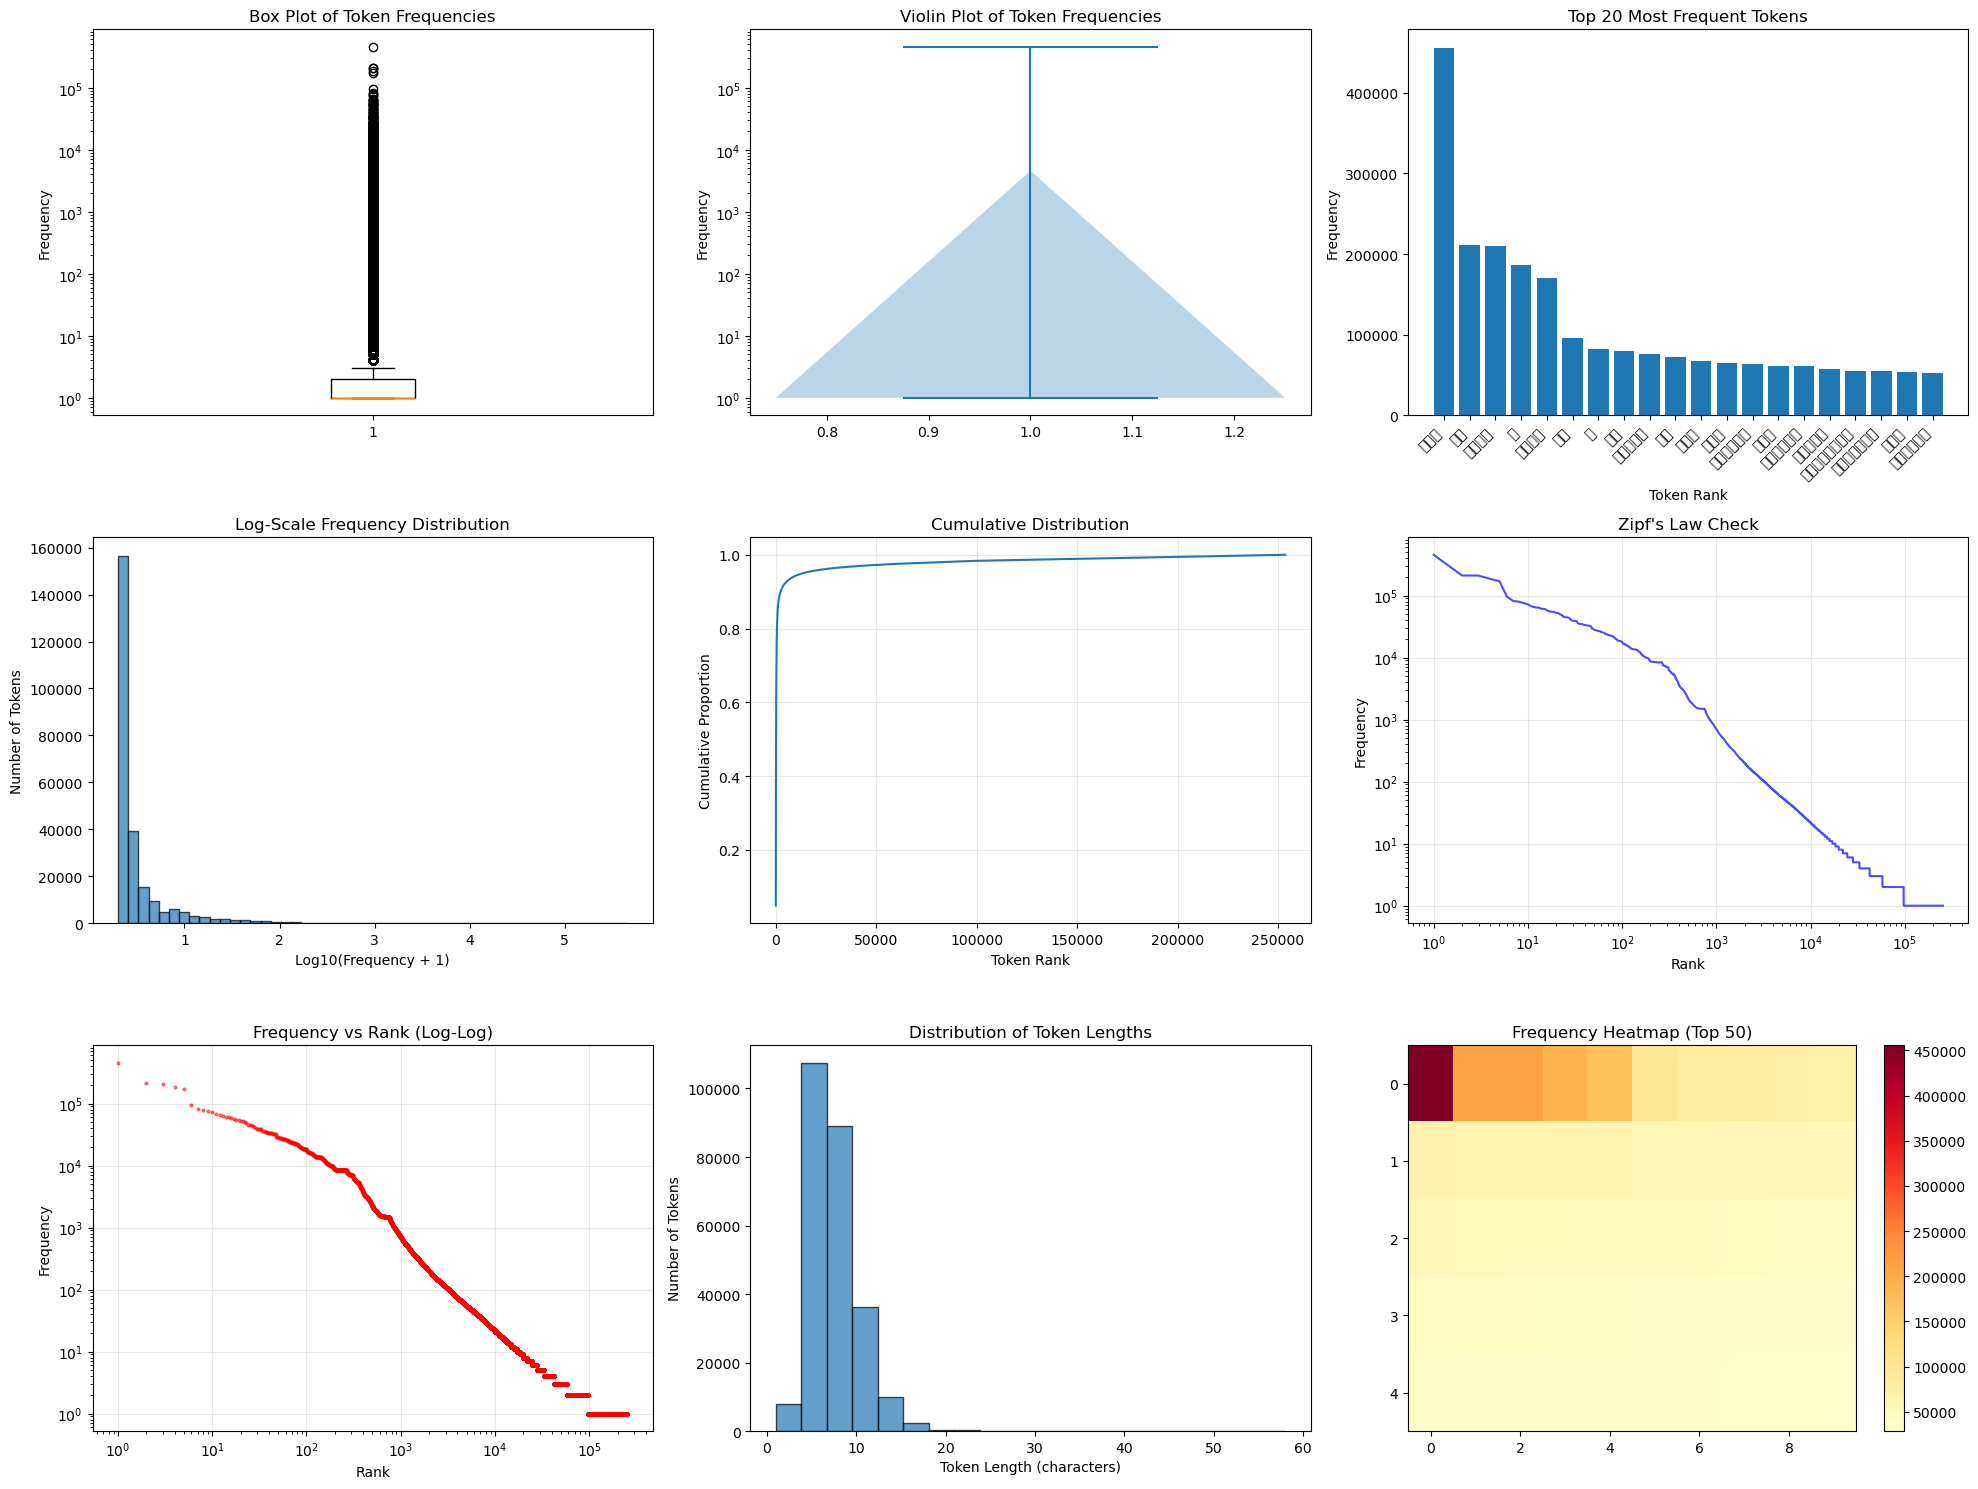


EDA ANALYSIS COMPLETE


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

def load_unigram_data(csv_path):
    """Load unigram data from CSV file."""
    df = pd.read_csv(csv_path)
    df = df.rename(columns={'Word': 'token', 'Count': 'count'})
    return df

def frequency_distribution_analysis(df, top_n=50, figsize=(15, 10)):
    """
    Analyze and visualize frequency distribution of tokens.
    """
    print("=== FREQUENCY DISTRIBUTION ANALYSIS ===")
    
    # Basic stats
    total_tokens = df['count'].sum()
    unique_tokens = len(df)
    print(f"Total tokens: {total_tokens:,}")
    print(f"Unique tokens: {unique_tokens:,}")
    print(f"Average frequency: {df['count'].mean():.2f}")
    print(f"Median frequency: {df['count'].median():.2f}")
    
    # Create visualizations
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    
    # 1. Top N tokens bar plot
    top_tokens = df.head(top_n)
    axes[0, 0].bar(range(len(top_tokens)), top_tokens['count'])
    axes[0, 0].set_title(f'Top {top_n} Most Frequent Tokens')
    axes[0, 0].set_xlabel('Token Rank')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].tick_params(axis='x', rotation=45)
    
    # 2. Frequency distribution histogram
    axes[0, 1].hist(df['count'], bins=50, alpha=0.7, edgecolor='black')
    axes[0, 1].set_title('Distribution of Token Frequencies')
    axes[0, 1].set_xlabel('Frequency')
    axes[0, 1].set_ylabel('Number of Tokens')
    axes[0, 1].set_yscale('log')
    
    # 3. Log-scale frequency distribution
    axes[1, 0].hist(np.log10(df['count'] + 1), bins=50, alpha=0.7, edgecolor='black')
    axes[1, 0].set_title('Log-Scale Distribution of Token Frequencies')
    axes[1, 0].set_xlabel('Log10(Frequency + 1)')
    axes[1, 0].set_ylabel('Number of Tokens')
    
    # 4. Cumulative distribution
    sorted_counts = df['count'].sort_values(ascending=False)
    cumulative = sorted_counts.cumsum() / total_tokens
    axes[1, 1].plot(range(len(cumulative)), cumulative)
    axes[1, 1].set_title('Cumulative Distribution of Token Frequencies')
    axes[1, 1].set_xlabel('Token Rank')
    axes[1, 1].set_ylabel('Cumulative Proportion')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'total_tokens': total_tokens,
        'unique_tokens': unique_tokens,
        'mean_frequency': df['count'].mean(),
        'median_frequency': df['count'].median()
    }

def summary_statistics(df):
    """
    Compute comprehensive summary statistics for token counts.
    """
    print("\n=== SUMMARY STATISTICS ===")
    
    counts = df['count']
    stats = {
        'count': len(counts),
        'mean': counts.mean(),
        'median': counts.median(),
        'mode': counts.mode().iloc[0] if not counts.mode().empty else None,
        'std': counts.std(),
        'var': counts.var(),
        'min': counts.min(),
        'max': counts.max(),
        'q1': counts.quantile(0.25),
        'q3': counts.quantile(0.75),
        'iqr': counts.quantile(0.75) - counts.quantile(0.25),
        'skewness': counts.skew(),
        'kurtosis': counts.kurtosis()
    }
    
    # Print formatted statistics
    print(f"Count: {stats['count']:,}")
    print(f"Mean: {stats['mean']:.2f}")
    print(f"Median: {stats['median']:.2f}")
    print(f"Mode: {stats['mode']}")
    print(f"Standard Deviation: {stats['std']:.2f}")
    print(f"Variance: {stats['var']:.2f}")
    print(f"Min: {stats['min']}")
    print(f"Max: {stats['max']:,}")
    print(f"Q1 (25th percentile): {stats['q1']:.2f}")
    print(f"Q3 (75th percentile): {stats['q3']:.2f}")
    print(f"IQR: {stats['iqr']:.2f}")
    print(f"Skewness: {stats['skewness']:.2f}")
    print(f"Kurtosis: {stats['kurtosis']:.2f}")
    
    return stats

def top_and_rare_tokens(df, top_n=20, rare_threshold=5):
    """
    Identify top frequent and rare tokens.
    """
    print(f"\n=== TOP {top_n} MOST FREQUENT TOKENS ===")
    top_tokens = df.head(top_n)
    for idx, row in top_tokens.iterrows():
        print(f"{row['token']}: {row['count']:,}")
    
    print(f"\n=== RARE TOKENS (frequency <= {rare_threshold}) ===")
    rare_tokens = df[df['count'] <= rare_threshold]
    print(f"Number of rare tokens: {len(rare_tokens):,}")
    print(f"Percentage of vocabulary: {len(rare_tokens)/len(df)*100:.2f}%")
    
    if len(rare_tokens) > 0:
        print("\nSample rare tokens:")
        sample_rare = rare_tokens.sample(min(10, len(rare_tokens)))
        for idx, row in sample_rare.iterrows():
            print(f"{row['token']}: {row['count']}")
    
    return {
        'top_tokens': top_tokens,
        'rare_tokens': rare_tokens,
        'rare_count': len(rare_tokens),
        'rare_percentage': len(rare_tokens)/len(df)*100
    }

def coverage_and_sparsity_analysis(df):
    """
    Analyze vocabulary coverage and sparsity.
    """
    print("\n=== COVERAGE AND SPARSITY ANALYSIS ===")
    
    total_tokens = df['count'].sum()
    unique_tokens = len(df)
    
    # Calculate coverage metrics
    coverage_metrics = {}
    
    # Top 1% tokens coverage
    top_1_percent = int(unique_tokens * 0.01)
    top_1_percent_tokens = df.head(top_1_percent)['count'].sum()
    coverage_metrics['top_1_percent_coverage'] = (top_1_percent_tokens / total_tokens) * 100
    
    # Top 10% tokens coverage
    top_10_percent = int(unique_tokens * 0.10)
    top_10_percent_tokens = df.head(top_10_percent)['count'].sum()
    coverage_metrics['top_10_percent_coverage'] = (top_10_percent_tokens / total_tokens) * 100
    
    # Top 50% tokens coverage
    top_50_percent = int(unique_tokens * 0.50)
    top_50_percent_tokens = df.head(top_50_percent)['count'].sum()
    coverage_metrics['top_50_percent_coverage'] = (top_50_percent_tokens / total_tokens) * 100
    
    # Hapax legomena (tokens that appear only once)
    hapax_legomena = len(df[df['count'] == 1])
    coverage_metrics['hapax_legomena'] = hapax_legomena
    coverage_metrics['hapax_percentage'] = (hapax_legomena / unique_tokens) * 100
    
    # Dis legomena (tokens that appear exactly twice)
    dis_legomena = len(df[df['count'] == 2])
    coverage_metrics['dis_legomena'] = dis_legomena
    coverage_metrics['dis_percentage'] = (dis_legomena / unique_tokens) * 100
    
    # Print results
    print(f"Total tokens: {total_tokens:,}")
    print(f"Unique tokens: {unique_tokens:,}")
    print(f"Type-token ratio: {unique_tokens/total_tokens:.4f}")
    print(f"\nCoverage Analysis:")
    print(f"Top 1% tokens cover: {coverage_metrics['top_1_percent_coverage']:.2f}% of all tokens")
    print(f"Top 10% tokens cover: {coverage_metrics['top_10_percent_coverage']:.2f}% of all tokens")
    print(f"Top 50% tokens cover: {coverage_metrics['top_50_percent_coverage']:.2f}% of all tokens")
    print(f"\nSparsity Analysis:")
    print(f"Hapax legomena (freq=1): {coverage_metrics['hapax_legomena']:,} ({coverage_metrics['hapax_percentage']:.2f}%)")
    print(f"Dis legomena (freq=2): {coverage_metrics['dis_legomena']:,} ({coverage_metrics['dis_percentage']:.2f}%)")
    
    return coverage_metrics

def token_filtering_analysis(df, thresholds=[1, 2, 5, 10, 50, 100]):
    """
    Analyze token filtering at different frequency thresholds.
    """
    print("\n=== TOKEN FILTERING ANALYSIS ===")
    
    total_tokens = df['count'].sum()
    unique_tokens = len(df)
    
    print("Threshold | Tokens Removed | Tokens Remaining | % Removed | % Tokens Lost")
    print("-" * 70)
    
    filtering_results = {}
    
    for threshold in thresholds:
        remaining_tokens = df[df['count'] >= threshold]
        tokens_removed = unique_tokens - len(remaining_tokens)
        tokens_lost = total_tokens - remaining_tokens['count'].sum()
        
        pct_tokens_removed = (tokens_removed / unique_tokens) * 100
        pct_tokens_lost = (tokens_lost / total_tokens) * 100
        
        print(f"{threshold:>8} | {tokens_removed:>13,} | {len(remaining_tokens):>15,} | {pct_tokens_removed:>8.2f}% | {pct_tokens_lost:>12.2f}%")
        
        filtering_results[threshold] = {
            'tokens_removed': tokens_removed,
            'tokens_remaining': len(remaining_tokens),
            'pct_tokens_removed': pct_tokens_removed,
            'pct_tokens_lost': pct_tokens_lost
        }
    
    return filtering_results

def outlier_detection(df, method='iqr', multiplier=1.5):
    """
    Detect outliers in token frequencies.
    """
    print(f"\n=== OUTLIER DETECTION (Method: {method.upper()}) ===")
    
    counts = df['count']
    
    if method == 'iqr':
        Q1 = counts.quantile(0.25)
        Q3 = counts.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR
        
        outliers = df[(df['count'] < lower_bound) | (df['count'] > upper_bound)]
        
    elif method == 'zscore':
        z_scores = np.abs((counts - counts.mean()) / counts.std())
        outliers = df[z_scores > multiplier]
        
    elif method == 'modified_zscore':
        median = counts.median()
        mad = np.median(np.abs(counts - median))
        modified_z_scores = 0.6745 * (counts - median) / mad
        outliers = df[np.abs(modified_z_scores) > multiplier]
    
    print(f"Number of outliers detected: {len(outliers):,}")
    print(f"Percentage of tokens: {len(outliers)/len(df)*100:.2f}%")
    
    if len(outliers) > 0:
        print(f"\nTop 10 outliers:")
        top_outliers = outliers.nlargest(10, 'count')
        for idx, row in top_outliers.iterrows():
            print(f"{row['token']}: {row['count']:,}")
    
    return outliers

def create_visualizations(df, figsize=(20, 15)):
    """
    Create comprehensive visualizations for unigram data.
    """
    print("\n=== CREATING VISUALIZATIONS ===")
    
    fig = plt.figure(figsize=figsize)
    
    # 1. Box plot
    plt.subplot(3, 3, 1)
    plt.boxplot(df['count'])
    plt.title('Box Plot of Token Frequencies')
    plt.ylabel('Frequency')
    plt.yscale('log')
    
    # 2. Violin plot
    plt.subplot(3, 3, 2)
    plt.violinplot(df['count'])
    plt.title('Violin Plot of Token Frequencies')
    plt.ylabel('Frequency')
    plt.yscale('log')
    
    # 3. Top 20 tokens bar plot
    plt.subplot(3, 3, 3)
    top_20 = df.head(20)
    plt.bar(range(len(top_20)), top_20['count'])
    plt.title('Top 20 Most Frequent Tokens')
    plt.xlabel('Token Rank')
    plt.ylabel('Frequency')
    plt.xticks(range(len(top_20)), top_20['token'], rotation=45, ha='right')
    
    # 4. Frequency distribution (log scale)
    plt.subplot(3, 3, 4)
    plt.hist(np.log10(df['count'] + 1), bins=50, alpha=0.7, edgecolor='black')
    plt.title('Log-Scale Frequency Distribution')
    plt.xlabel('Log10(Frequency + 1)')
    plt.ylabel('Number of Tokens')
    
    # 5. Cumulative distribution
    plt.subplot(3, 3, 5)
    sorted_counts = df['count'].sort_values(ascending=False)
    cumulative = sorted_counts.cumsum() / sorted_counts.sum()
    plt.plot(range(len(cumulative)), cumulative)
    plt.title('Cumulative Distribution')
    plt.xlabel('Token Rank')
    plt.ylabel('Cumulative Proportion')
    plt.grid(True, alpha=0.3)
    
    # 6. Zipf's law check
    plt.subplot(3, 3, 6)
    ranks = np.arange(1, len(df) + 1)
    frequencies = df['count'].values
    plt.loglog(ranks, frequencies, 'b-', alpha=0.7)
    plt.title("Zipf's Law Check")
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # 7. Frequency vs Rank (log-log)
    plt.subplot(3, 3, 7)
    plt.loglog(ranks, frequencies, 'ro', markersize=2, alpha=0.5)
    plt.title('Frequency vs Rank (Log-Log)')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    
    # 8. Token length distribution
    plt.subplot(3, 3, 8)
    token_lengths = df['token'].str.len()
    plt.hist(token_lengths, bins=20, alpha=0.7, edgecolor='black')
    plt.title('Distribution of Token Lengths')
    plt.xlabel('Token Length (characters)')
    plt.ylabel('Number of Tokens')
    
    # 9. Frequency heatmap (top 50 tokens)
    plt.subplot(3, 3, 9)
    top_50 = df.head(50)
    heatmap_data = top_50['count'].values.reshape(5, 10)
    plt.imshow(heatmap_data, cmap='YlOrRd', aspect='auto')
    plt.title('Frequency Heatmap (Top 50)')
    plt.colorbar()
    
    plt.tight_layout()
    plt.show()

def create_wordcloud(df, max_words=100, figsize=(12, 8)):
    """
    Create a word cloud from the most frequent tokens.
    """
    print("\n=== CREATING WORD CLOUD ===")
    
    # Prepare data for word cloud
    word_freq = dict(zip(df['token'], df['count']))
    
    # Create word cloud
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white',
        max_words=max_words,
        colormap='viridis',
        font_path=None  # You can specify a font path for Devanagari
    ).generate_from_frequencies(word_freq)
    
    # Display
    plt.figure(figsize=figsize)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud (Top {max_words} Tokens)')
    plt.show()

def comprehensive_eda(csv_path, top_n=50, figsize=(20, 15)):
    """
    Run comprehensive EDA analysis on unigram data.
    """
    print("STARTING COMPREHENSIVE EDA ANALYSIS")
    print("=" * 50)
    
    # Load data
    df = load_unigram_data(csv_path)
    print(f"Loaded {len(df):,} tokens from {csv_path}")
    
    # Run all analyses
    freq_stats = frequency_distribution_analysis(df, top_n, figsize)
    summary_stats = summary_statistics(df)
    top_rare = top_and_rare_tokens(df, top_n)
    coverage = coverage_and_sparsity_analysis(df)
    filtering = token_filtering_analysis(df)
    outliers = outlier_detection(df)
    
    # Create visualizations
    create_visualizations(df, figsize)
    # create_wordcloud(df)
    
    print("\n" + "=" * 50)
    print("EDA ANALYSIS COMPLETE")
    
    return {
        'data': df,
        'frequency_stats': freq_stats,
        'summary_stats': summary_stats,
        'top_rare': top_rare,
        'coverage': coverage,
        'filtering': filtering,
        'outliers': outliers
    }

# Example usage:
if __name__ == "__main__":
    # Run comprehensive EDA
    results = comprehensive_eda('unigram_re.csv')

In [ ]:
import pandas as pd

# Adjust path and header as needed
df = pd.read_csv('unigram_re.csv', names=['word','count'], skiprows=1)  # or header=0 if file has headers
df['word'] = df['word'].astype(str)
df['count'] = df['count'].astype(int)

# Words containing Devanagari digits (०-९: \u0966-\u096F)
mask = df['word'].str.contains(r'[\u0966-\u096F]', regex=True, na=False)

# How many unique words contain digits
num_unique_with_digits = df.loc[mask, 'word'].nunique()
# Total frequency of such words
total_count_with_digits = df.loc[mask, 'count'].sum()

print('unique_words_with_digits:', num_unique_with_digits)
print('total_count_with_digits:', total_count_with_digits)

# # If you want to drop words containing digits and save cleaned CSV
# df_clean = df[~mask]
# df_clean.to_csv('unigram_no_digits.csv', index=False)

# # If you prefer stripping digits from words and aggregating counts
# df_strip = df.copy()
# df_strip['word'] = df_strip['word'].str.replace(r'[\u0966-\u096F]', '', regex=True)
# df_strip = df_strip[df_strip['word'] != '']
# df_strip = df_strip.groupby('word', as_index=False)['count'].sum()
# df_strip.to_csv('unigram_digits_stripped_aggregated.csv', index=False)

unique_words_with_digits: 41202
total_count_with_digits: 376685


In [ ]:
# Alternative font setup
import matplotlib.font_manager as fm

# List available fonts
fonts = [f.name for f in fm.fontManager.ttflist if 'devanagari' in f.name.lower() or 'hindi' in f.name.lower()]
print("Available Devanagari fonts:", fonts)

# Set specific font if available
if fonts:
    plt.rcParams['font.family'] = fonts[0]